In [100]:
import spacy

In [104]:
import pandas as pd

In [105]:
movie_lines_features = ["LineID", "Character", "Movie", "Name", "Line"]
movie_lines = pd.read_csv("movie_lines.txt", sep = "\+\+\+\$\+\+\+", engine = "python", index_col = False, names = movie_lines_features)
movie_lines.head()

,LineID,Character,Movie,Name,Line
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [106]:
movie_characters_features = ["Character", "Name", "Movie", "Title", "Gender",'Position']
movie_characters = pd.read_csv("movie_characters_metadata.txt", sep = "\+\+\+\$\+\+\+", engine = "python", index_col = False, names = movie_characters_features)
movie_characters = movie_characters[['Character', 'Title', 'Gender']]
movie_characters.head()

,Character,Title,Gender
0,u0,10 things i hate about you,f
1,u1,10 things i hate about you,?
2,u2,10 things i hate about you,m
3,u3,10 things i hate about you,?
4,u4,10 things i hate about you,m


In [107]:
movie_lines.Character = movie_lines.Character.str.strip()
movie_characters.Character = movie_characters.Character.str.strip()
character_lines = movie_characters.merge(movie_lines, left_on='Character', right_on='Character')
character_lines.head()

,Character,Title,Gender,LineID,Movie,Name,Line
0,u0,10 things i hate about you,f,L1045,m0,BIANCA,They do not!
1,u0,10 things i hate about you,f,L985,m0,BIANCA,I hope so.
2,u0,10 things i hate about you,f,L925,m0,BIANCA,Let's go.
3,u0,10 things i hate about you,f,L872,m0,BIANCA,Okay -- you're gonna need to learn how to lie.
4,u0,10 things i hate about you,f,L870,m0,BIANCA,I'm kidding. You know how sometimes you just...


In [108]:
gender_filter_f = character_lines['Gender'].str.strip() == 'f'
character_lines_f = character_lines[gender_filter_f]
character_lines_f.head()

,Character,Title,Gender,LineID,Movie,Name,Line
0,u0,10 things i hate about you,f,L1045,m0,BIANCA,They do not!
1,u0,10 things i hate about you,f,L985,m0,BIANCA,I hope so.
2,u0,10 things i hate about you,f,L925,m0,BIANCA,Let's go.
3,u0,10 things i hate about you,f,L872,m0,BIANCA,Okay -- you're gonna need to learn how to lie.
4,u0,10 things i hate about you,f,L870,m0,BIANCA,I'm kidding. You know how sometimes you just...


In [109]:
gender_filter_m = character_lines['Gender'].str.strip() == 'm'
character_lines_m = character_lines[gender_filter_m]
character_lines_m.head()

,Character,Title,Gender,LineID,Movie,Name,Line
101,u2,10 things i hate about you,m,L1044,m0,CAMERON,They do to!
102,u2,10 things i hate about you,m,L984,m0,CAMERON,She okay?
103,u2,10 things i hate about you,m,L924,m0,CAMERON,Wow
104,u2,10 things i hate about you,m,L871,m0,CAMERON,No
105,u2,10 things i hate about you,m,L868,m0,CAMERON,"The ""real you""."


In [110]:
a_lines_f = ''
for s_line in character_lines_f['Line']:
    a_lines_f = str(a_lines_f) + ' ' + str(s_line)

In [111]:
print(a_lines_f[0:1000])

  They do not!  I hope so.  Let's go.  Okay -- you're gonna need to learn how to lie.  I'm kidding.  You know how sometimes you just become this "persona"?  And you don't know how to quit?  Like my fear of wearing pastels?  What good stuff?  Me.  This endless ...blonde babble. I'm like, boring myself.  do you listen to this crap?  Then Guillermo says, "If you go any lighter, you're gonna look like an extra on 90210."  But  Well, no...  I was?  Tons  You know Chastity?  Hi.  Who knows?  All I've ever heard her say is that she'd dip before dating a guy that smokes.  Lesbian?  No. I found a picture of Jared Leto in one of her drawers, so I'm pretty sure she's not harboring same-sex tendencies.  I really, really, really wanna go, but I can't.  Not unless my sister goes.  Eber's Deep Conditioner every two days. And I never, ever use a blowdryer without the diffuser attachment.  You're sweet.  I counted on you to help my cause. You and that thug are obviously failing. Aren't we ever going on

In [112]:
a_lines_m = ''
for s_line in character_lines_m['Line']:
    a_lines_m = str(a_lines_m) + ' ' + str(s_line)

In [113]:
print(a_lines_m[0:1000])

  They do to!  She okay?  Wow  No  The "real you".  I figured you'd get to the good stuff eventually.  Thank God!  If I had to hear one more story about your coiffure...  What crap?  No...  You always been this selfish?  Then that's all you had to say.  You never wanted to go out with 'me, did you?  I looked for you back at the party, but you always seemed to be "occupied".  Have fun tonight?  I believe we share an art instructor  Looks like things worked out tonight, huh?  So that's the kind of guy she likes? Pretty ones?  She's not a...  I'm workin' on it. But she doesn't seem to be goin' for him.  Sure have.  How do you get your hair to look like that?  You have my word.  As a gentleman  You got something on your mind?  There.  Well, there's someone I think might be --  That's because it's such a nice one.  Right.  See?  You're ready for the quiz.  Let me see what I can do.  That's a shame.  Why?  Seems like she could get a date easy enough...  Cameron.  Forget it.  Okay... then how

In [114]:
nlp_lines_f = nlp(a_lines_f[0:1000000])

In [115]:
nlp_lines_m = nlp(a_lines_m[0:1000000])

In [1]:
#Veranschaulichung
#for nl in nlp_lines_f:
    #print(nl.text, '--->', nl.lemma_)
    #print(nl.pos_)

In [147]:
custom_stops = ['PRON','want','tell','come','know','think','look','time', 'right','good','let','thing']
for custom_stop in custom_stops:
    print(custom_stop)
    nlp.Defaults.stop_words.add(custom_stop)
    nlp.vocab[custom_stop].is_stop = True

PRON
want
tell
come
know
think
look
time
right
good
let
thing


In [148]:
a_lines_new_f = ''
for nl in nlp_lines_f:
    if nl.pos_ != 'PRON' and nl.pos_ != 'DET':
        if nlp.vocab[nl.lemma_].is_stop == False: 
             #print(nl.lemma_,nlp.vocab[nl.lemma_].is_stop)
             a_lines_new_f += nl.lemma_ + ' '
             #print(nl.pos_, nl.lemma_)

    else:
        if nlp.vocab[nl.text].is_stop == False:
            a_lines_new_f += nl.text


In [149]:
a_lines_new_m = ''
for nl in nlp_lines_m:
    if nl.pos_ != 'PRON' and nl.pos_ != 'DET':
        if nlp.vocab[nl.lemma_].is_stop == False: 
             #print(nl.lemma_,nlp.vocab[nl.lemma_].is_stop)
             a_lines_new_m += nl.lemma_ + ' '
             #print(nl.pos_, nl.lemma_)

    else:
        if nlp.vocab[nl.text].is_stop == False:
            a_lines_new_m += nl.text


female


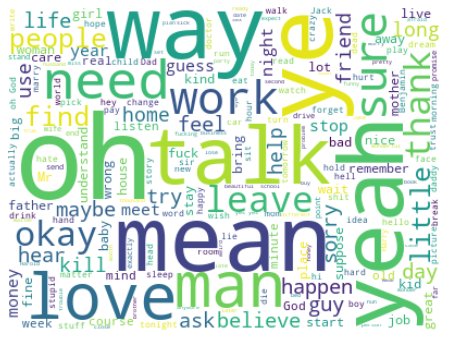

male


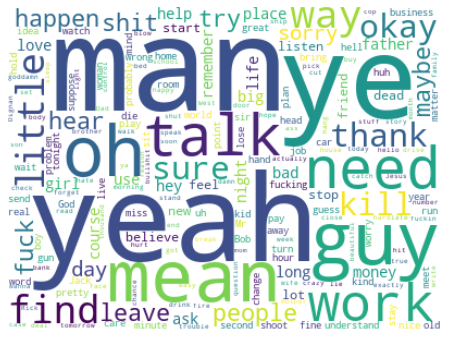

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word for female lines
wordcloud = WordCloud(background_color="white",width=400, height=300).generate(a_lines_new_f)
print('female')
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Generate a word for male lines
wordcloud = WordCloud(background_color="white",width=400, height=300).generate(a_lines_new_m)
print('male')
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()